In [1]:
from Izh_net import *
from net_preparation import *
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 
import numpy as np

In [16]:
class AF_limb:
    def __init__(self, q0=np.pi/2):
        # Creating system
        # application current matrix
        Q_app = np.eye(2)

        # afferent matrix
        Q_aff = 5*np.ones((2, 6))
        # output matrix
        P = np.eye(2)
        # neuron types
        types = ['FS', 'FS']
        A, B, C, D = types2params(types)
        print(A, B, C, D)
        # Create params' array from neurons
        net = Izhikevich_IO_Network(input_size = 2, output_size = 2, 
                                afferent_size = 6,
                                N=2, Q_app = Q_app,
                                Q_aff = Q_aff , P = P,
                                a=A, b=B, c=C, d=D)
        net.M = np.zeros((2, 2))

    
        # Limb settings
        flexor = SimpleAdaptedMuscle(w = 1, N=1)
        extensor = SimpleAdaptedMuscle(w = 1, N=1)
        Limb = OneDOFLimb(q0=q0, b=0.01, a1 = 0.2,
                      a2= 0.07, m=0.3, l=0.3)
        
        AL = Simple_Afferented_Limb(
                Limb = Limb,
                Flexor = flexor,
                Extensor = extensor
                )

        # Creating all system
        self.sys = Net_Limb_connect(Network=net,
                           Limb = AL)
    def set_Q_aff(self, Q_aff):
        self.sys.net.Q_aff = Q_aff
        
    def run(self, T):
        N = self.sys.net.N
        self.sys.set_init_conditions(
                v_noise=np.random.normal(size=N)
        )
        V = np.zeros((len(T), N))
        F_flex = np.zeros(len(T))
        F_ext = np.zeros(len(T))
        Afferents = np.zeros((len(T), 6))
        Q = np.zeros(len(T))
        W = np.zeros(len(T))
        dt = T[1] - T[0]
        for i, t in enumerate(T):
            V[i] = self.sys.net.V_prev
            F_flex[i] = self.sys.F_flex
            F_ext[i] = self.sys.F_ext
            Afferents[i] = self.sys.Limb.output
            Q[i] = self.sys.q
            W[i] = self.sys.w
            self.sys.step(dt = dt, Iapp = input(t))
        return V, F_flex, F_ext, Afferents, Q, W

In [14]:
model = AF_limb(q0=-np.pi/2+0.1)
Q_aff = np.array([
    
])
T_max = 2000
time_scale = 2
T = np.linspace(0, T_max, T_max*time_scale)
I = np.zeros(2)
I[0] = 0
I[1] = 0
input = lambda t: (I)
V, F_flex, F_ext, Afferents, Q, W = model.run(T)

[0.1 0.1] [0.2 0.2] [-65. -65.] [2. 2.]


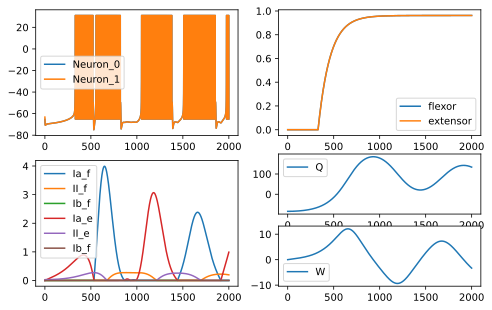

In [15]:
# running system
plt.figure(figsize=(8, 5))
plt.subplot(221)
     
for i in range(2):
    plt.plot(T, V[:, i], label=f"{model.sys.net.names[i]}")
plt.legend()

plt.subplot(222)
plt.plot(T, F_flex, label='flexor')
plt.plot(T, F_ext, label='extensor')
plt.legend()

plt.subplot(223)
aff_types = ['Ia_f', 'II_f', 'Ib_f', 'Ia_e', 'II_e', 'Ib_f' ]
for i in range(6):
    plt.plot(T, Afferents[:, i], label=aff_types[i])
plt.legend()

plt.subplot(426)
plt.plot(T, Q*180/np.pi, label="Q")
plt.legend()
plt.subplot(428)
plt.plot(T, W, label='W')
plt.legend()
plt.show()